<a href="https://colab.research.google.com/github/cy8902/machine_Leaning/blob/main/4_1_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀

In [ ]:
 self.dxy = [[0, -1], [0, -2], [0, -3], [0, -4], [0, -5], [0, -6], [0, -7], [0, -8], [0, -9], # 0-8  차,졸,포,사,왕
                    [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0],                  # 9-16
                    [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9],          # 17-25
                    [-1, 0], [-2, 0], [-3, 0], [-4, 0], [-5, 0], [-6, 0], [-7, 0], [-8, 0],          # 26-33
                    [1, -2], [2, -1], [2, 1], [1, 2], [-1, 2], [-2, 1], [-2, -1], [-1, -2],          # 34-41  마
                    [2, -3], [3, -2], [3, 2], [2, 3], [-2, 3], [-3, 2], [-3, -2], [-2, -3],          # 42-49  상
                    [1, -1], [2, -2], [1, 1], [2, 2], [-1, 1], [-2, 2], [-1, -1], [-2, -2]]          # 50-57 궁성안의 대각선 움직임          # 42-49  상

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/4-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 럭키백의 확률

### 데이터 준비하기

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data') ## csv 파일을 가져와 fish에 저장
fish.head()  # 앞의 5개를 보여줌

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
print(pd.unique(fish['Species'])) ## unique() 는 species 칼람의 중복값을 빼고 출력해주는 것

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy() ## species 빼고 나머지는 input데이터로 만들어서 numpy 배열로 바꿔준다.

In [ ]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split ## 트레인 세트와 타겟 세트로 나눠주는 과정 꼭 필요하다!

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42) ## 왜 셔플함?

In [ ]:
from sklearn.preprocessing import StandardScaler ## 데이터셋을 정규화 하는 과정! 데이터 스케일링!(정규화)

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### k-최근접 이웃 분류기의 확률 예측

In [ ]:
from sklearn.neighbors import KNeighborsClassifier ## 불러오고

kn = KNeighborsClassifier(n_neighbors=3) ## 보통 3이 제일 좋다. n_neighbors 는 주변에 비교할 계수 설정
kn.fit(train_scaled, train_target) # 데이터 훈련

print(kn.score(train_scaled, train_target))  # 트레인의 점수 출력
print(kn.score(test_scaled, test_target))    # 훈련셋의 점수 출력

0.8907563025210085
0.85


In [ ]:
print(kn.classes_) # 클래스를 보는 함수

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5]) ## 클래스별 확률값을 반환
print(np.round(proba, decimals=4))## 라운드는 5개의 값을 보여주고 decimals 로 소수점 몇번째까지 나올지를 예측

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


## 로지스틱 회귀

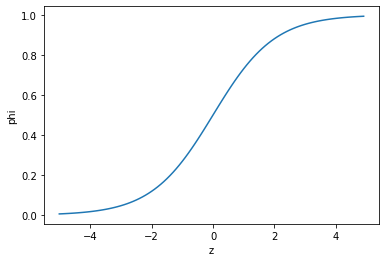

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1) # -5부터 5까지 그래프 그래주기
phi = 1 / (1 + np.exp(-z))  # np.exp(-z) = 는 자연로그 e의 -z 이다.

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

### 로지스틱 회귀로 이진 분류 수행하기

In [ ]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [ ]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt') ## 인덱스가 브림이나 스멜트 인경우만 출력
train_bream_smelt = train_scaled[bream_smelt_indexes]   ## 왜 train_scaled[]안에 브림과 스멜을 집어넣어주는거지?! (인덱스가 스케일과 타켓이 일치하므로) 
target_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
print(lr.predict(train_bream_smelt[:5])) # 0부터 4의 예측값을 출력

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
print(lr.predict_proba(train_bream_smelt[:5])) # 0부터 4의 각 컬럼별 확률을 출력 lr.predict_proba

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [ ]:
print(lr.classes_) # 

['Bream' 'Smelt']


In [ ]:
print(lr.coef_, lr.intercept_) # lr.coef_ 이아이는 무엇? intercept_ 이아는 또한 무엇?

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [ ]:
decisions = lr.decision_function(train_bream_smelt[:5]) ## z값을 구해주는 함수
print(train_bream_smelt)
print(decisions)

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]
 [ 0.9027693   0.70314202  0.88858491  1.89027545  0.85537174]
 [-1.0824759  -1.61150165 -1.62162731 -1.7000674  -1.92815631]
 [ 0.10337949  0.04717013  0.23714575  0.88445197  0.41799764]
 [ 1.49668216  1.03112796  1.21864741  2.44274986  1.40289707]
 [ 0.23004337  0.23459067  0.42823457  1.3336029   0.39983213]
 [-0.42579405 -0.29018684 -0.11028847  0.65627104 -0.26107519]
 [ 1.28557569  0.70314202  0.89727076  1.98228866  1.06683526]
 [ 0.93373158  0.60943175  0.83646978  1.85150445  0.97832415]
 [ 0.80706771  0.60943175  0.81041221  1.63137406  1.0255057 ]
 [-1.07262426 -1.52716241 -1.55214047 -1.67235972 -1.86207776]
 [ 1.6374198   1.17169337  1.27076255  2.41341232  1.40143407]
 [-1.07966115 -1.63961473 -1.67374245 -1.6462819  -1.87

In [ ]:
from scipy.special import expit ## 사이파이에 시그모이드 함수가 있다.

print(expit(decisions)) # 시그모이드 함수 계산

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


### 로지스틱 회귀로 다중 분류 수행하기

In [ ]:
lr = LogisticRegression(C=20, max_iter=1000)  ## 다중분류 수행!
lr.fit(train_scaled, train_target) ## 훈련 실시 트레인!

print(lr.score(train_scaled, train_target))# 트레인 스코어 보기
print(lr.score(test_scaled, test_target)) # test 스코어 보기

0.9327731092436975
0.925


In [ ]:
print(lr.predict(test_scaled[:5])) # 테스트 5개의 예측

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
print(kn.classes_) ## 컬럼이 정렬된 순으로 볼 수 있다.
proba = lr.predict_proba(test_scaled[:5]) # proba로 예측값 보기
print(np.round(proba, decimals=3)) # 소수 3자리까지

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(lr.coef_.shape, lr.intercept_.shape)  # 계수의 쉐잎과 , 변수의 쉐잎을 본다. 특성이 5개인 z함수가 7쌍이 나옴 변수또한 7개가 나옴

(7, 5) (7,)


In [ ]:
decision = lr.decision_function(test_scaled[:5]) ## 뭐였더라?! Z 값을 구해주는 함수
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

NameError: ignored

10
9
9
8
7



ValueError: ignored